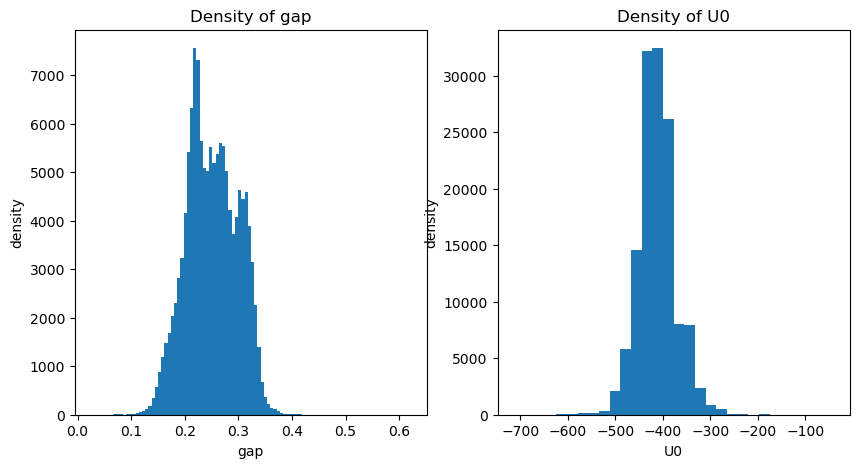

In [34]:
# read qm9.csv and extract gap U0 column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/qm9.csv', usecols=['gap'])
df2 = pd.read_csv('data/qm9.csv', usecols=['U0'])

# plot density of U0 and gap in one row
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(df1['gap'], bins=100)
ax[0].set_xlabel('gap')
ax[0].set_ylabel('density')
ax[0].set_title('Density of gap')
ax[1].hist(df2['U0'], bins=30)
ax[1].set_xlabel('U0')
ax[1].set_ylabel('density')
ax[1].set_title('Density of U0')
plt.show()

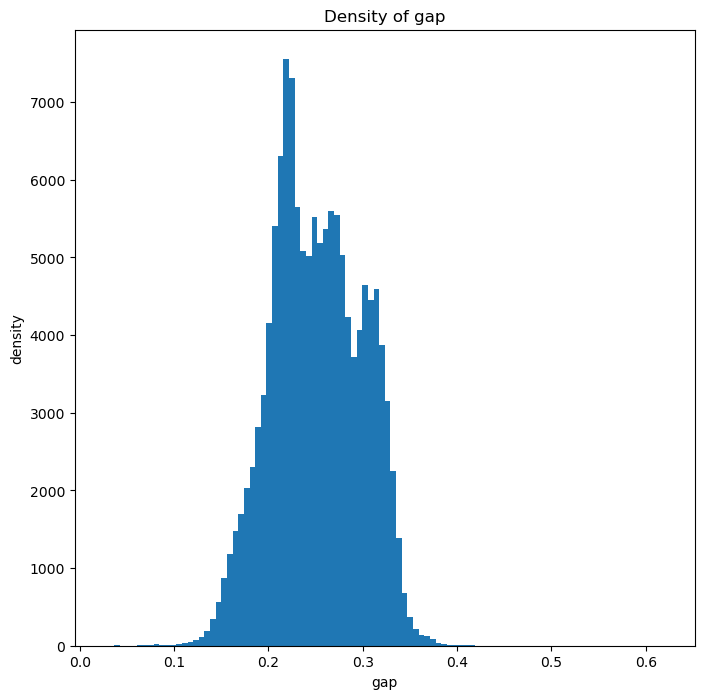

In [40]:
plt.hist(df1['gap'], bins=100)
plt.xlabel('gap')
plt.ylabel('density')
plt.title('Density of gap')
plt.show()

## Convert QM9 nx

In [27]:
import pickle 

with open('data/qm9_test_cell_complex.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
mol = data[1]
print(mol.nodes)
print(mol.edges)
print(mol.cells)
print(mol.nodes(data=True))
print(mol.edges(data=True))
print(mol.name)


[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (2, 4), (2, 5), (3, 2), (4, 2), (5, 2), (5, 6), (5, 7), (6, 5), (6, 7), (7, 6), (7, 5)]
CellView([Cell((5, 6, 7))])
[(0, {'label': 'C'}), (1, {'label': 'C'}), (2, {'label': 'C'}), (3, {'label': 'C'}), (4, {'label': 'O'}), (5, {'label': 'C'}), (6, {'label': 'C'}), (7, {'label': 'C'})]
[(0, 1, {'label': 1}), (1, 0, {'label': 1}), (1, 2, {'label': 1}), (2, 1, {'label': 1}), (2, 3, {'label': 1}), (2, 4, {'label': 1}), (2, 5, {'label': 1}), (3, 2, {'label': 1}), (4, 2, {'label': 1}), (5, 2, {'label': 1}), (5, 6, {'label': 1}), (5, 7, {'label': 1}), (6, 5, {'label': 1}), (6, 7, {'label': 1}), (7, 6, {'label': 1}), (7, 5, {'label': 1})]
{'gap': 0.3293, 'U0': -350.197275}


In [13]:
from cell_loader import extract_node_feature_qm9, extract_edge_features_qm9
import torch
from torch_geometric.data import Data

In [28]:
pyg_data_test_list = []
for cc in data:
    node_feature = extract_node_feature_qm9(cc)
    edge_feature = extract_edge_features_qm9(cc)
    edge_list = list(cc.edges)
    edge_index = torch.tensor(edge_list, dtype=torch.long)
    edge_index = edge_index.t().contiguous()
    
    values_list = list(cc.name.values())
    tensor = torch.tensor(values_list, dtype=torch.float)
    tensor = tensor.view(1, -1)
    pyg_data = Data(x=node_feature, edge_index=edge_index, edge_attr=edge_feature, y=tensor)
    
    pyg_data_test_list.append(pyg_data)

with open('data/qm9_test_pyg_data.pkl', 'wb') as f:
    pickle.dump(pyg_data_test_list, f)

In [29]:
import pickle
with open('data/qm9_test_pyg_data.pkl', 'rb') as f:
    pyg_data_test_list = pickle.load(f)

In [32]:
pyg_data_test_list[0]

Data(x=[8, 4], edge_index=[2, 14], edge_attr=[14, 3], y=[1, 2])

In [19]:
from torch_geometric.loader import DataLoader

data_loader = DataLoader(pyg_data_test_list, batch_size=32, shuffle=True)

for batch in data_loader:
    print(batch)
    print(batch.num_graphs)
    print(batch.x.size())
    print(batch.edge_index.size())
    print(batch.edge_attr.size())
    break

DataBatch(x=[285, 4], edge_index=[2, 618], edge_attr=[618, 3], batch=[285], ptr=[33])
32
torch.Size([285, 4])
torch.Size([2, 618])
torch.Size([618, 3])


## Geting Rank-2 cells (rings) for molecules 

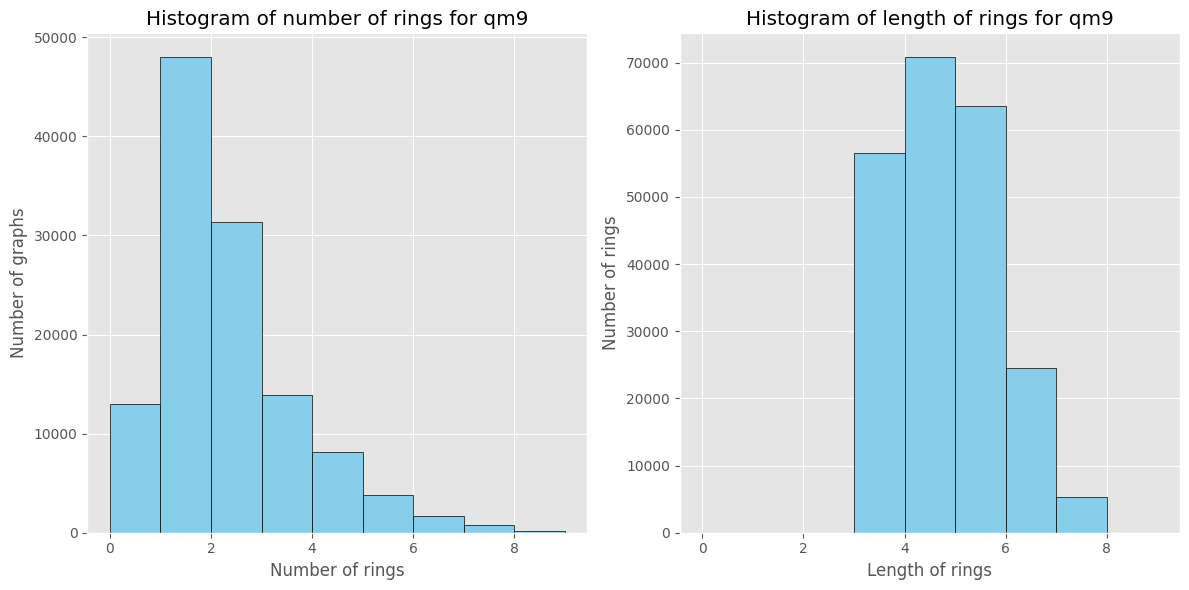

In [7]:
with open('data/qm9_train_rings.pkl', 'rb') as f:
    qm9_rings = pickle.load(f)

qm9_rings_count = []
qm9_rings_len = []

for i in range(len(qm9_rings)):
    qm9_rings_count.append(len(qm9_rings[i]))
    for j in range(len(qm9_rings[i])):
        qm9_rings_len.append(len(qm9_rings[i][j]))

# plot histogram
import matplotlib.pyplot as plt
import numpy as np

# Use a style for the plot
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram with a color and edge color
axs[0].hist(qm9_rings_count, bins=np.arange(0, 10, 1), color='skyblue', edgecolor='black')
axs[0].set_xlabel('Number of rings')
axs[0].set_ylabel('Number of graphs')
axs[0].set_title('Histogram of number of rings for qm9')

# Plot the second histogram with a color and edge color
axs[1].hist(qm9_rings_len, bins=np.arange(0, 10, 1), color='skyblue', edgecolor='black')
axs[1].set_xlabel('Length of rings')
axs[1].set_ylabel('Number of rings')
axs[1].set_title('Histogram of length of rings for qm9')

plt.tight_layout()
plt.show()


In [8]:
# calculate the average number of edges
import numpy as np

with open('data/qm9_train_cell_complex.pkl', 'rb') as f:
    qm9_train_cc = pickle.load(f)

In [9]:
qm9_train_cc[0].number_of_edges()

2

18.80314569536424


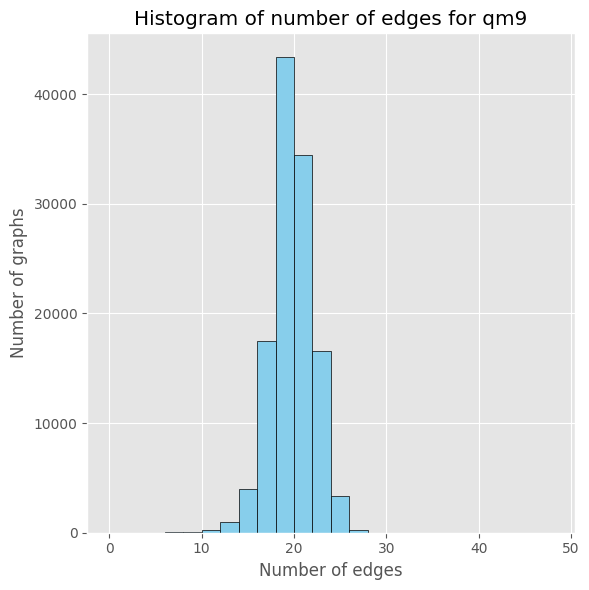

In [13]:
edges = []
for i in range(len(qm9_train_cc)):
    edges.append(qm9_train_cc[i].number_of_edges())
    
print(np.mean(edges))
# plot histogram
import matplotlib.pyplot as plt
import numpy as np

# Use a style for the plot
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
# Plot the first histogram with a color and edge color
axs.hist(edges, bins=np.arange(0, 50, 2), color='skyblue', edgecolor='black')
axs.set_xlabel('Number of edges')
axs.set_ylabel('Number of graphs')
axs.set_title('Histogram of number of edges for qm9')

plt.tight_layout()
plt.show()

## Create Cell Complexes with TopoModelX

We can choose following attributes for nodes: 
1. label: type of atom 
2. atomic_num
3. formal charge 
4. chiral_tag 
5. hybridization
6. num_explicit_hs 
7. is_aromatic 


In [7]:
from toponetx.classes.cell_complex import CellComplex

cell_complex = CellComplex(mol, {'gap' : 0.1, 'U0': 23})
cell_complex.nodes(data=True)
print(cell_complex.get_node_attributes('label'))
print(cell_complex.get_node_attributes('atomic_num'))

{0: 'C', 1: 'C', 2: 'C', 3: 'O', 4: 'O', 5: 'C', 6: 'C', 7: 'O', 8: 'C'}
{0: 6, 1: 6, 2: 6, 3: 8, 4: 8, 5: 6, 6: 6, 7: 8, 8: 6}


In [205]:
cell_complex.name

{'gap': 0.1, 'U0': 23}

In [151]:
# if we only consider label for now 
from utils.data_loader_mol import extract_node_feature_matrix_qm9

node_feature_matrix = extract_node_feature_matrix_qm9(cell_complex)
print(node_feature_matrix)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]])


The label of edge determines single, double, and triple bonds.

In [152]:
from utils.data_loader_mol import extract_edge_features_qm9
print(cell_complex.get_edge_attributes('label'))

# extract edge features
edge_features = extract_edge_features_qm9(cell_complex)
print(edge_features)

{(0, 1): 1, (1, 2): 1, (1, 8): 1, (2, 3): 1, (2, 8): 1, (3, 4): 2, (4, 5): 1, (4, 6): 1, (6, 7): 2, (6, 8): 1}
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])


# derive upper and lower laplacian matrix for edges

In [161]:
cell_complex.add_cells_from(mol_rings, rank=2)
print(cell_complex.shape)
print(cell_complex.edges(data=True))
print(cell_complex.down_laplacian_matrix(rank=1, signed = False).todense())
print(cell_complex.up_laplacian_matrix(rank=1, signed = False).todense())

(9, 11, 2)
[(0, 1, {'label': 1}), (0, 4, {}), (1, 2, {'label': 1}), (1, 8, {'label': 1}), (2, 3, {'label': 1}), (2, 8, {'label': 1}), (3, 4, {'label': 2}), (4, 5, {'label': 1}), (4, 6, {'label': 1}), (6, 7, {'label': 2}), (6, 8, {'label': 1})]
[[2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 2. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 2. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 2. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 2. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 2. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 2. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 2.]]
[[2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0.]
 [2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0.]
 [2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [170]:
G = nx.Graph()
G.graph['my_attribute'] = 0.898

# Access the attribute
print(G.graph['my_attribute'])


0.898


In [16]:
with open('data/qm9_train_cell_complex.pkl', 'rb') as f:
    qm9_train_cell_complex = pickle.load(f)

In [17]:
max([len(cell_complex.edges) for cell_complex in qm9_train_cell_complex])

13

In [13]:
max([len(cell_complex.nodes) for cell_complex in qm9_train_cell_complex])

9

In [30]:
import torch
cc = qm9_train_cell_complex[180]
torch.from_numpy(cc.up_laplacian_matrix(rank=1, signed = False).todense()).float()

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.]])

In [14]:
import torch

# Example edge feature matrix: 5 edges, 4 features per edge
edge_features = torch.tensor([
    [1, 2, 3, 4],
    [4, 3, 2, 1],
    [1, 3, 1, 3],
    [2, 2, 2, 2],
    [5, 1, 3, 4]
])

# Max pooling across edges
max_pooled_features = torch.max(edge_features, 0)[0]

print(max_pooled_features)


tensor([5, 3, 3, 4])


In [8]:
def group_indices(lst):
    # Dictionary to hold indices for each unique value
    indices = {}
    for i, val in enumerate(lst):
        if val not in indices:
            indices[val] = []
        indices[val].append(i)

    # Convert the dictionary values to a list of lists
    grouped_indices = list(indices.values())
    return grouped_indices

# Example usage
integer_list = [0, 0, 0, 1, 1, 1, 2, 2, 3]
grouped_indices = group_indices(integer_list)
print(grouped_indices)


[[0, 1, 2], [3, 4, 5], [6, 7], [8]]


In [16]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a = [[0, 2]]

# Flatten the list of lists

# Index the first and third rows
selected_rows = tensor[a]

print(selected_rows) 

tensor([[1, 2, 3],
        [7, 8, 9]])


In [1]:
import pickle

with open('check_points/can_losses_dict.pkl', 'rb') as f:
    can_losses_dict = pickle.load(f)



In [7]:
can = can_losses_dict['out_channels: 32, heads: 3, n_layers: 2']
train_losses = can['train_losses']
val_losses = can['val_losses']
test_losses = can['test_losses']

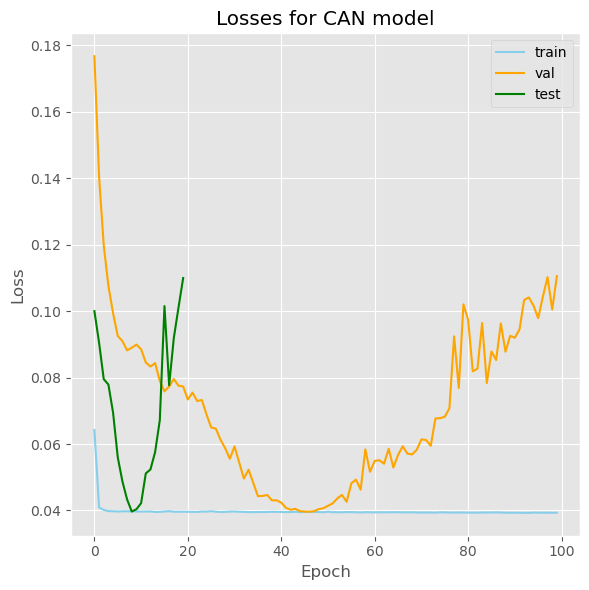

In [8]:
# plot the training loss
import matplotlib.pyplot as plt
import numpy as np

# Use a style for the plot
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 1, figsize=(6, 6))

# Plot the first histogram with a color and edge color
axs.plot(np.arange(0, len(train_losses), 1), train_losses, color='skyblue', label='train')
axs.plot(np.arange(0, len(val_losses), 1), val_losses, color='orange', label='val')
axs.plot(np.arange(0, len(test_losses), 1), test_losses, color='green', label='test')
axs.set_xlabel('Epoch')
axs.set_ylabel('Loss')

axs.set_title('Losses for CAN model')
axs.legend()

plt.tight_layout()

plt.show()

In [ ]:
# Training
model.train()
prev_train_loss = float('inf')
train_losses = []
val_losses = []
test_losses = []
best_val_loss = float('inf')
best_model_state_dict = None  # Initialize to None
test_interval = 5
start_time = time.time()
epoch_times = []  # List to store time for each epoch

for epoch in range(1, num_epochs+1):  # You can adjust the number of epochs
    epoch_loss = []
    for data in train_loader:
        data = data.to(device)
        data.y = data.y[:, 0].view(-1, 1) #/ 27.2114
        optimizer.zero_grad()
        
        output = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

        # Accumulate the loss for each batch
        epoch_loss.append(loss.item())

    # Calculate the average training loss for the epoch
    average_train_loss = np.mean(epoch_loss)
    train_losses.append(average_train_loss)  # Save training loss for plotting

    # Print training loss every epoch
    print(f'Epoch {epoch}, Average Training Loss: {average_train_loss}')

    # Validation
    model.eval()
    val_loss = []
    with torch.no_grad():
        for data in val_loader:
            data = data.to(device)
            data.y = data.y[:, 0].view(-1, 1) #/ 27.2114
            output = model(data.x, data.edge_index, data.edge_attr, data.batch)
            val_loss.append(criterion(output, data.y).item())
    average_val_loss = np.mean(val_loss)
    val_losses.append(average_val_loss)

    # Print validation loss every epoch
    print(f'Epoch {epoch}, Average Validation Loss: {average_val_loss}')

    # Save the best model based on validation loss
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        best_model_state_dict = model.state_dict()

    # Test the model at test_interval epochs
    if epoch % test_interval == 0:
        total_test_loss = []
        with torch.no_grad():
            for data in test_loader:
                data = data.to(device)
                data.y = data.y[:, 0].view(-1, 1) #/ 27.2114
                output = model(data.x, data.edge_index, data.edge_attr, data.batch)
                total_test_loss.append(criterion(output, data.y).item())

        average_test_loss = np.mean(total_test_loss)
        test_losses.append(average_test_loss)  # Save test loss for plotting
        print(f'Epoch {epoch}, Average Test Loss: {average_test_loss}')

    # Record time for the epoch
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # Print the time taken for the epoch
    print(f'Epoch {epoch}, Time: {epoch_time}')

# Print the final average test loss
print(f'Final Average Test Loss: {average_test_loss}')

# Save the best model
torch.save(best_model_state_dict, 'best_model.pt')

# Record time and losses
losses_dict_gin = {
    'train_losses': train_losses,
    'val_losses': val_losses,
    'test_losses': test_losses,
    'best_val_loss': best_val_loss,
    'epoch_times': epoch_times,  # List of times for each epoch
}

# Save the losses_dict as a pickle file
with open('losses_dict_gin.pkl', 'wb') as f:
    pickle.dump(losses_dict_gin, f)